# In Depth Analysis of American Airlines (AAL)

> Running Baseline Models for EDA and Modeling of stock time series forecasting

> Historical stock data obtained from Yahoo Finance

> Using ARIMA, Auto Arima and Facebook Prophet models

In [1]:
from Functions import *

In [2]:
df = pd.read_csv('AAL.csv')

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,54.279999,54.599998,53.070000,53.910000,51.079910,10748600
1,2015-01-05,54.369999,54.540001,53.340000,53.880001,51.051495,11565000
2,2015-01-06,54.270000,54.430000,52.130001,53.040001,50.255585,13772200
3,2015-01-07,53.380001,53.650002,52.119999,53.009998,50.227158,10069800
4,2015-01-08,53.480000,54.279999,53.250000,53.660000,50.843029,9672100
5,2015-01-09,53.669998,53.910000,51.820000,52.020000,49.289120,12351600
6,2015-01-12,51.060001,51.450001,49.200001,49.580002,46.977230,18261300
7,2015-01-13,50.119999,51.430000,49.459999,50.400002,47.754177,12259300
8,2015-01-14,49.410000,50.230000,48.099998,49.410000,46.816143,15684700
9,2015-01-15,49.139999,50.400002,48.580002,49.410000,46.816143,10396900


# Preprocessing Function

> From the default stock data provided, we want to look at the change in Adj Close price over time (days)

> The Volume will be our exogenous variable

In [4]:
X, Xvol = preprocess(init_data = df, exog = True)

In [5]:
X.head()

Date
2015-01-02    51.079910
2015-01-05    51.051495
2015-01-06    50.255585
2015-01-07    50.227158
2015-01-08    50.843029
Name: Adj Close, dtype: float64

In [6]:
Xvol.head()

Date
2015-01-02    10748600
2015-01-05    11565000
2015-01-06    13772200
2015-01-07    10069800
2015-01-08     9672100
Name: Volume, dtype: int64

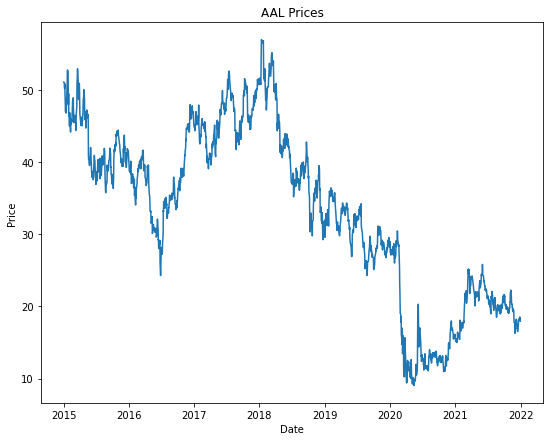

In [7]:
figure = plt.figure(figsize=(9,7))
plt.plot(X)
plt.title('AAL Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

# Log Transformations and FB Prophet Prep

> Preprocessing can perform log transformations on the data

> Can also shape the data in the format used by Prophet

In [8]:
Xlog, Xvollog = preprocess(init_data = df, exog = True, logged = True)
Xfb = preprocess(init_data = df, facebook = True)

In [9]:
Xlog.head()

Date
2015-01-02    3.933391
2015-01-05    3.932835
2015-01-06    3.917122
2015-01-07    3.916556
2015-01-08    3.928743
Name: Adj Close, dtype: float64

In [10]:
Xfb.head()

,ds,y
0,2015-01-02,51.079910
1,2015-01-05,51.051495
2,2015-01-06,50.255585
3,2015-01-07,50.227158
4,2015-01-08,50.843029


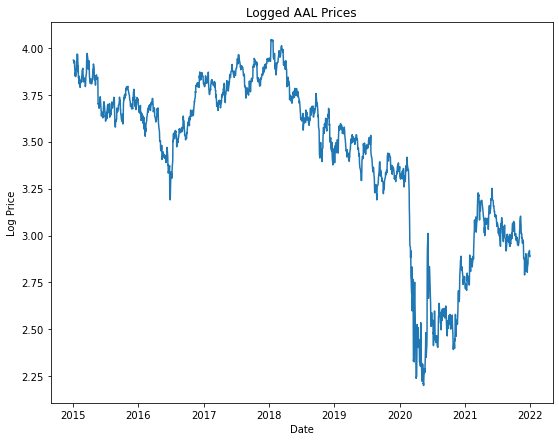

In [11]:
figure2 = plt.figure(figsize=(9,7))
plt.plot(Xlog)
plt.title('Logged AAL Prices')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.show();

# Train Test Split for Time Series

> Instead of taking random samples of the data, train test split sets a cutoff date for training and testing data

> The same preprocessing above is built in to the split, along with log transform and prophet set up

> The split is 85% Train, 15% Test

In [12]:
Xtrain,Xtrainvol,Xtest,Xtestvol = train_test(df, exog = True)

In [13]:
Xtrain.head()

Date
2015-01-02    51.079910
2015-01-05    51.051495
2015-01-06    50.255585
2015-01-07    50.227158
2015-01-08    50.843029
Name: Adj Close, dtype: float64

In [14]:
Xtest.head()

Date
2020-08-10    14.00
2020-08-11    13.73
2020-08-12    13.54
2020-08-13    13.30
2020-08-14    13.33
Name: Adj Close, dtype: float64

In [15]:
length_data = len(df)
length_train = len(Xtrain)
length_test = len(Xtest)
print('Total Data Length:',length_data)
print('Train Length:', length_train, length_train/length_data*100,"%")
print('Test Length:', length_test, length_test/length_data*100,"%")

Total Data Length: 1763
Train Length: 1410 79.97731140102098 %
Test Length: 353 20.022688598979013 %


# ARIMA Order Parameters 

> These functions provide intial p,d,q values from ACF, PACF and Dickey-Fuller tests

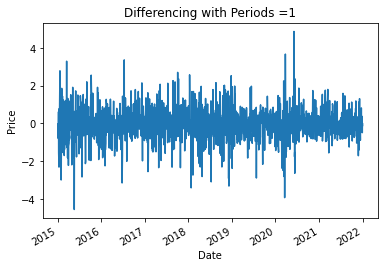

In [16]:
d = return_d(data = X, plotting = True)

/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


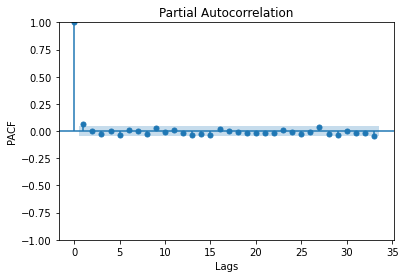

In [17]:
# Uses differenced data to calculate PACF

p = return_p(data = X, plotting = True) 

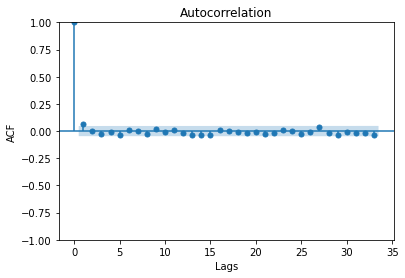

In [18]:
# Uses differenced data to calculate ACF

q = return_q(data = X, plotting = True) 

In [19]:
print("p = ",p)
print("d = ",d)
print("q = ",q)

p =  1
d =  1
q =  1


# Modeling

# ARIMA Model:

/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29053D+00    |proj g|=  1.99636D+09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   1.996D+09   1.291D+00
  F =   1.2905311876113277     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


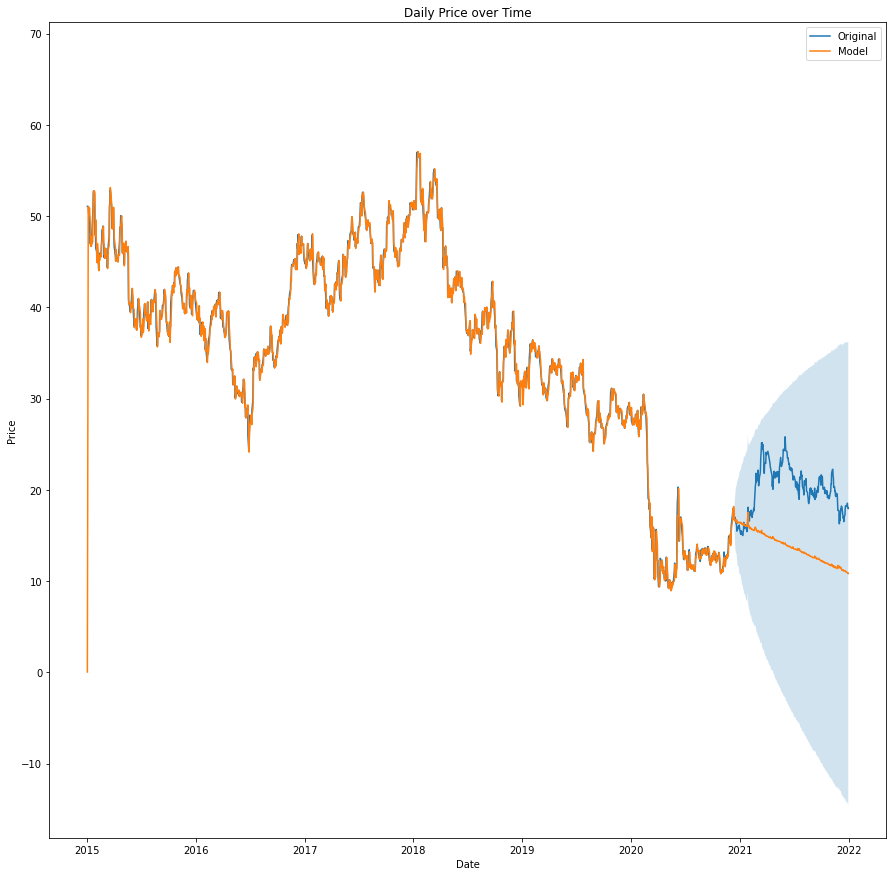

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1498
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1933.216
Date:                Mon, 07 Feb 2022   AIC                           3876.431
Time:                        11:20:19   BIC                           3902.988
Sample:                             0   HQIC                          3886.326
                               - 1498                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0210      0.002    -12.684      0.000      -0.024      -0.018
Volume      5.747e-09   5.86e-10      9.811      0.000     4.6e-09    6.89e-09
ar.L1          0.0095      0.011      0.849      0.3

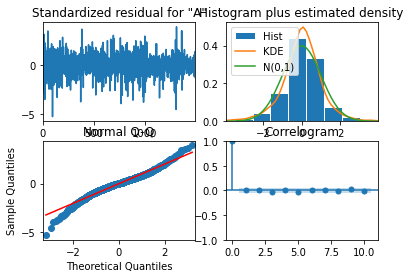

In [20]:
arima = base_model(df, 
                   exog = True,
                   logged = False,
                   plotting = True,
                   summary = True,
                   mse = True)

/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.99048D+00    |proj g|=  8.91497D-02

At iterate    5    f= -1.99048D+00    |proj g|=  2.30322D-03

At iterate   10    f= -1.99048D+00    |proj g|=  2.06299D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     24      1     0     0   5.927D-03  -1.990D+00
  F =  -1.9904829725421438     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


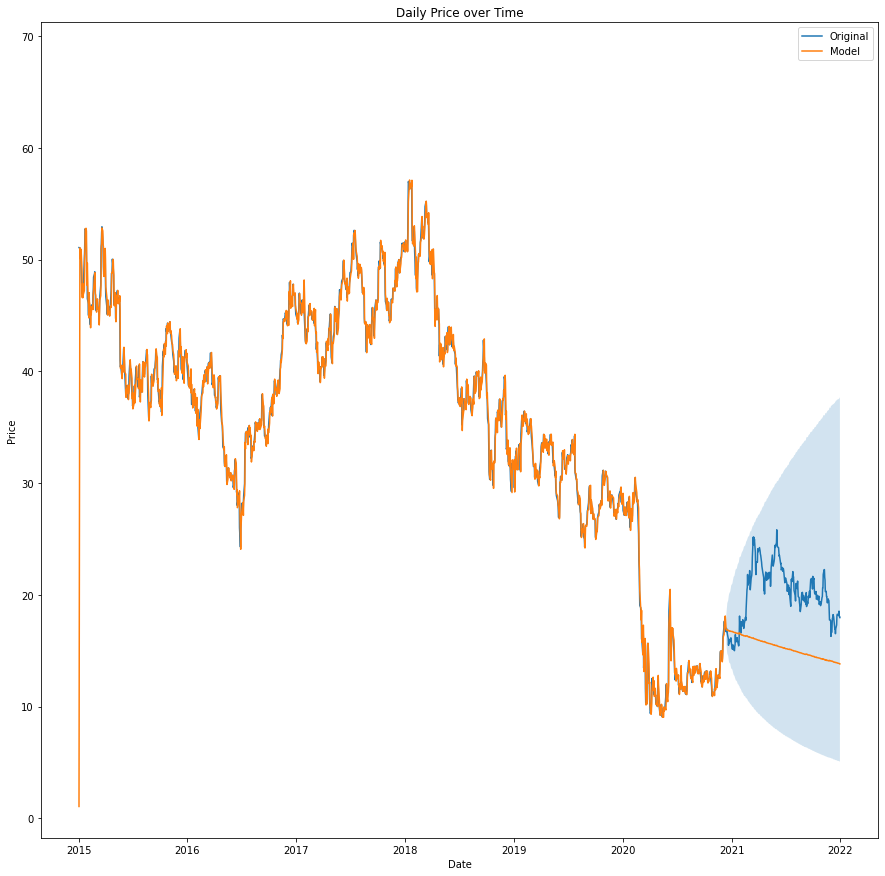

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1498
Model:               SARIMAX(1, 1, 1)   Log Likelihood                2981.743
Date:                Mon, 07 Feb 2022   AIC                          -5953.487
Time:                        11:20:20   BIC                          -5926.931
Sample:                             0   HQIC                         -5943.593
                               - 1498                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0007      0.001     -0.644      0.519      -0.003       0.001
Volume         0.0034      0.002      1.991      0.046    5.31e-05       0.007
ar.L1          0.0694      0.121      0.572      0.5

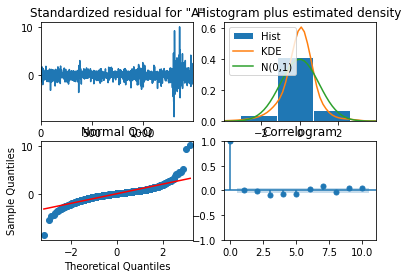

In [21]:
arima_logged = base_model(df,
                          exog = True,
                          logged = True,
                          plotting = True,
                          summary = True,
                          mse = True)

# Base Model Findings

> Base ARIMA model has an AIC of 3876.431 and RMSE of 7.09

> Base ARIMA model with log transformed data has an AIC of -5953.49 and RMSE of  5.54 

> In both evaluation metrics, the log transformed model performed better

> Visually, the untransformed and log transformed models appears to steadily declining. 

> The Volume variable is was insignificant for the both models

# Auto Arima Model: 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3895.929, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3897.877, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3891.203, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3891.206, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3896.856, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3893.171, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3893.184, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3891.060, Time=1.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3896.270, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3891.346, Time=1.63 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3894.262, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3895.009, Time=2.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3890.926, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3892.033, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]          

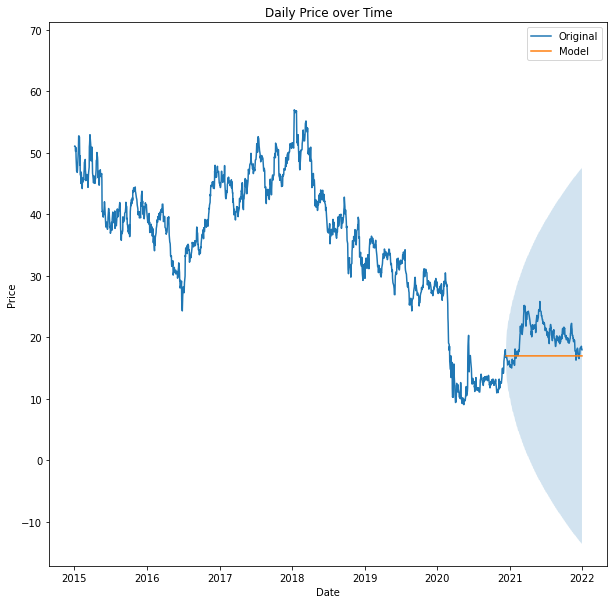

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1498
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1943.024
Date:                Mon, 07 Feb 2022   AIC                           3890.048
Time:                        11:20:30   BIC                           3900.670
Sample:                             0   HQIC                          3894.006
                               - 1498                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0766      0.023      3.325      0.001       0.031       0.122
sigma2         0.7851      0.019     40.369      0.000       0.747       0.823
Ljung-Box (L1) (Q):                   0.00   Jarque-

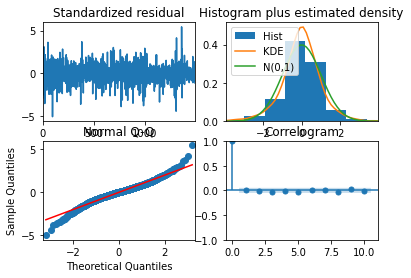

In [22]:
autoarima = create_auto_arima(df,
                              exog = True,
                              logged = False,
                              plotting = True,
                              summary = True,
                              mse = True, 
                              trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5975.296, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5934.251, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5954.399, Time=0.63 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5954.880, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5935.526, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5954.362, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5951.227, Time=0.82 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-5964.703, Time=1.89 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-5972.672, Time=1.87 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5952.913, Time=0.68 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-5963.831, Time=0.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5970.044, Time=1.62 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-5970.503, Time=2.32 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-5976.427, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0

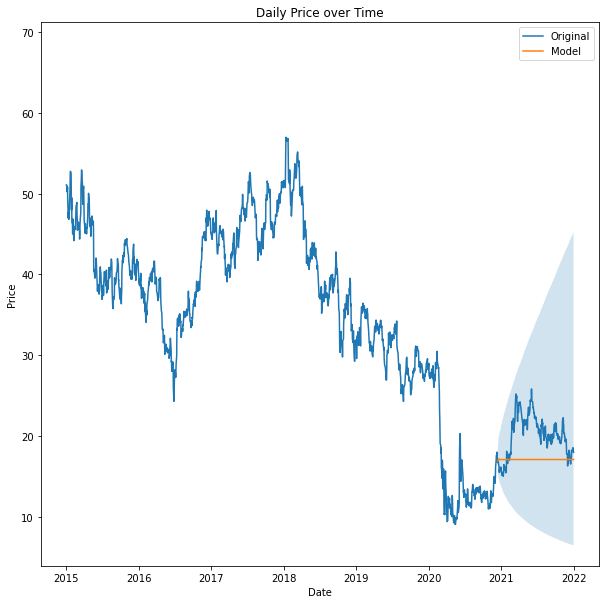

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1498
Model:               SARIMAX(2, 1, 2)   Log Likelihood                2993.214
Date:                Mon, 07 Feb 2022   AIC                          -5976.427
Time:                        11:20:52   BIC                          -5949.871
Sample:                             0   HQIC                         -5966.533
                               - 1498                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1716      0.055     21.350      0.000       1.064       1.279
ar.L2         -0.6303      0.056    -11.279      0.000      -0.740      -0.521
ma.L1         -1.0625      0.065    -16.443      0.0

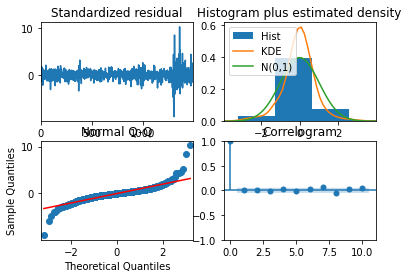

In [23]:
autoarima_logged = create_auto_arima(df,
                                     exog = True,
                                     logged = True,
                                     plotting = True,
                                     summary = True,
                                     mse = True, 
                                     trace = True)

## Auto ARIMA Findings:

> The auto ARIMA model with untransformed data performed roughly the same as the base ARIMA model. 
>> AIC = 3890.05 and RMSE = 4.01 

> The auto ARIMA model with log transformed data also performed roughly the same as results to base ARIMA with transformed data. 
>> AIC = -5976.43 and RMSE = 3.93

> Visually, the untransformed and log transformed models appear to be neutral and the same.

# Facebook Prophet Model

Initial log joint probability = -18.8044
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3478.03    0.00296649       243.506      0.5529      0.5529      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3510.63    0.00653673        828.96           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       3518.13   0.000600416        492.41   2.377e-06       0.001      299  LS failed, Hessian reset 
     299          3525    0.00122789       159.056           1           1      394   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     347       3533.83    0.00068047       921.034   1.036e-06       0.001      494  LS failed, Hessian reset 
     399       3542.25    0.00161354       232.686       2.074      0.2074      555   
    Iter      log pro

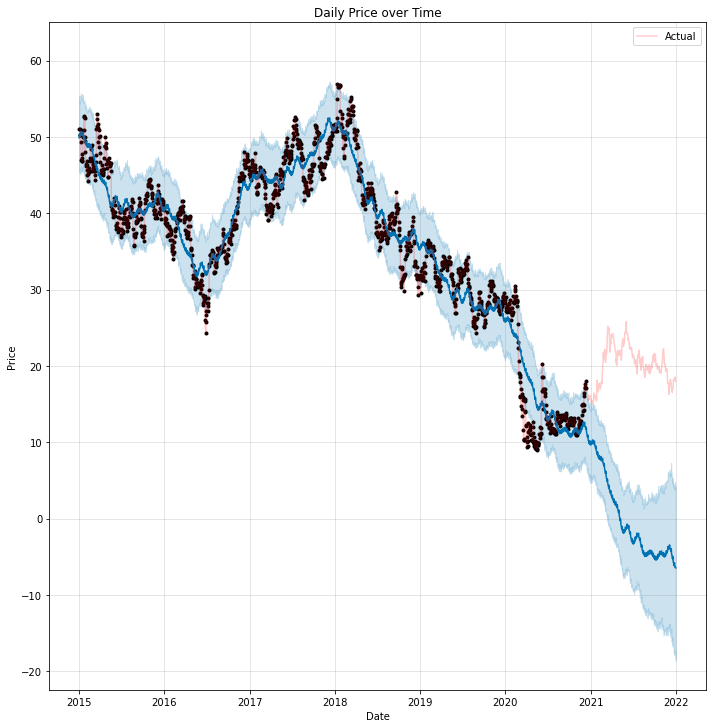

Prophet Test RMSE: 21.30079920390264


In [24]:
fb = create_prophet(data = df,
                    logged = False,
                    plotting = True,
                    mse = True)

Initial log joint probability = -6.89747
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4442.62    0.00275324       603.803           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       4448.93   2.55712e-05       146.703   1.249e-07       0.001      217  LS failed, Hessian reset 
     199       4463.28    0.00736339       1196.34           1           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4469.92    0.00501108       336.836           1           1      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     357       4474.38   1.46714e-05       75.9174   9.749e-08       0.001      525  LS failed, Hessian reset 
     380       4475.29   4.36525e-05       200.584   9.348e-08       0.001      603  LS failed, Hessian rese

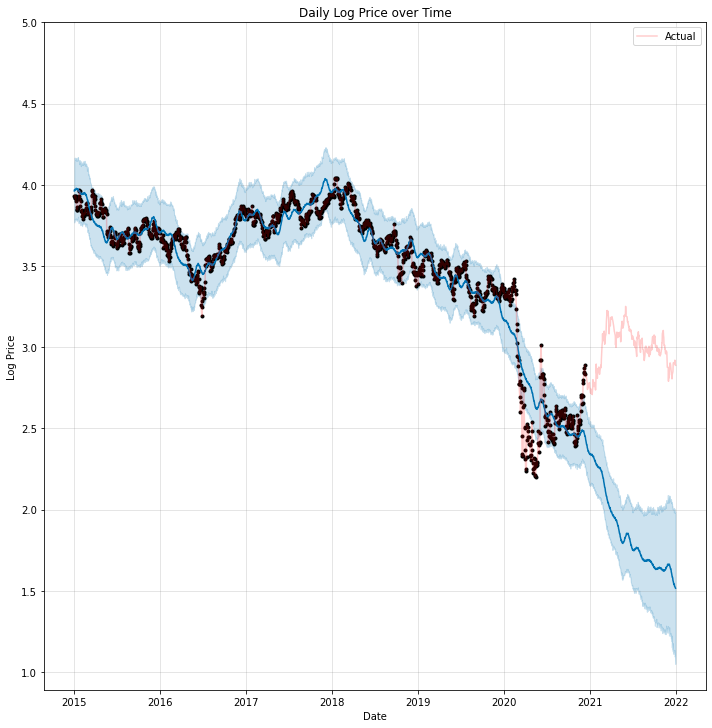

Logged Prophet Test RMSE: 13.90567254187748


In [25]:
fb_logged = create_prophet(data = df,
                           logged = True,
                           plotting = True,
                           mse = True)

## Facebook Prophet Findings: 

> Base Model with untransformed data had an RMSE of 21.30.

> The Model with log transformed data had a slightly improved RMSE of 13.91

> In the visualizations, both models provided a safe forecasting based on the declining trend.

> However, both the untransformed and transformed model undervalued the future prices


# Highest Growths in 90 Days

> Utilizing the best version of each model above, the models will be refit using the entire data set and forecasting the growth after 90 days

/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/sammy/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.00528D+00    |proj g|=  7.42835D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2      5      1     0     0   4.986D-03  -2.005D+00
  F =  -2.0052840109805690     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


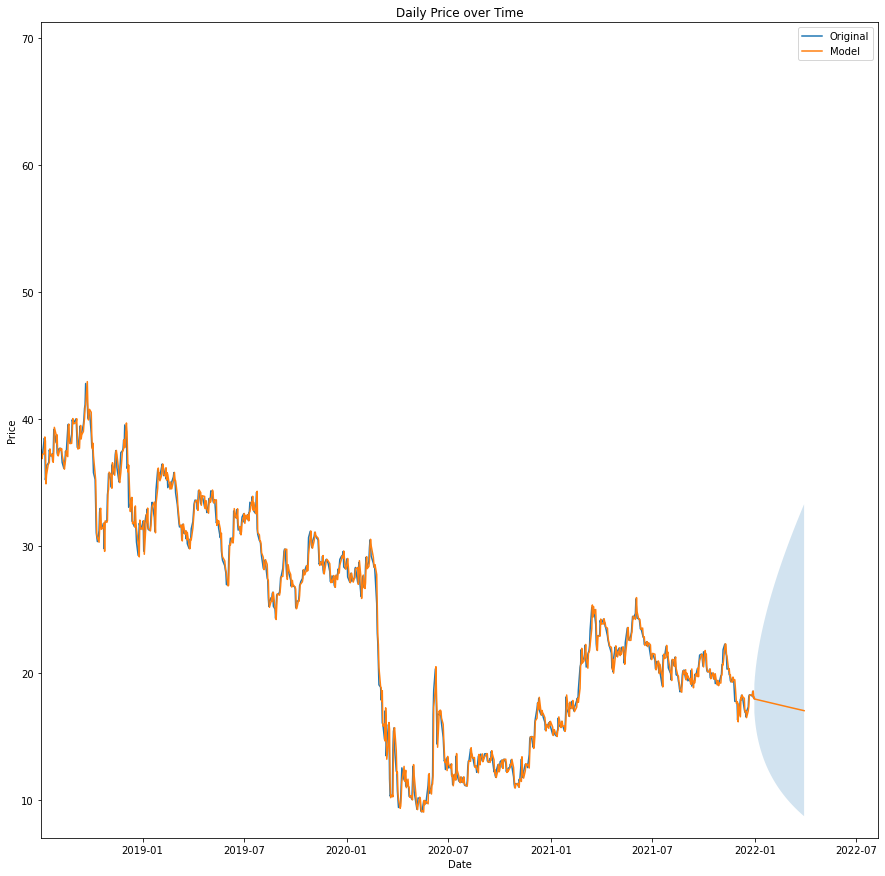

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1763
Model:               SARIMAX(1, 1, 1)   Log Likelihood                3535.316
Date:                Mon, 07 Feb 2022   AIC                          -7062.631
Time:                        11:21:06   BIC                          -7040.735
Sample:                             0   HQIC                         -7054.540
                               - 1763                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0005      0.001     -0.679      0.497      -0.002       0.001
ar.L1          0.0829      0.141      0.590      0.555      -0.193       0.358
ma.L1          0.0181      0.142      0.128      0.8

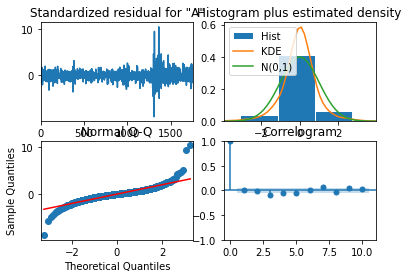

In [26]:
arima_90, arima_roi = base_model(df,
                                 exog = True,
                                 logged = True,
                                 plotting = True,
                                 summary = True,
                                 full = True,
                                 roi = True, 
                                 return_roi = True)

# Auto ARIMA Growth

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7084.038, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7048.536, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7064.527, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7064.700, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7049.956, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7067.398, Time=1.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7072.536, Time=1.66 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-7072.882, Time=2.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-7081.502, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7062.631, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-7076.032, Time=1.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-7081.440, Time=2.38 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-7079.574, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-7086.795, Time=1.00 sec
 ARIMA(1,1,2)(0,0,0

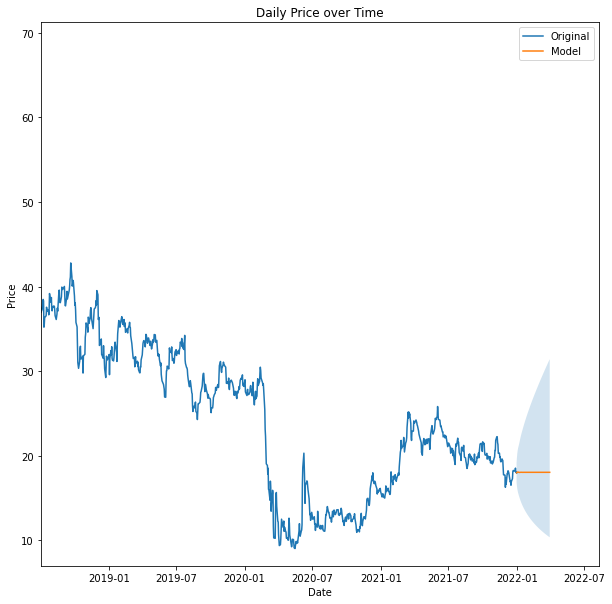

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1763
Model:               SARIMAX(2, 1, 2)   Log Likelihood                3548.398
Date:                Mon, 07 Feb 2022   AIC                          -7086.795
Time:                        11:21:26   BIC                          -7059.424
Sample:                             0   HQIC                         -7076.681
                               - 1763                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2326      0.058     21.361      0.000       1.120       1.346
ar.L2         -0.6508      0.060    -10.770      0.000      -0.769      -0.532
ma.L1         -1.1453      0.067    -17.115      0.0

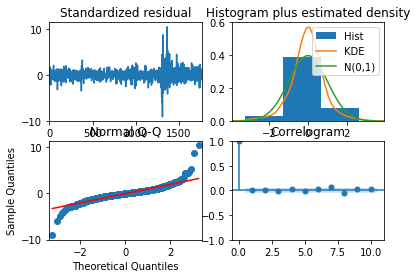

In [27]:
autoarima_90, autoarima_roi = create_auto_arima(df,
                                                exog = True,
                                                logged = True,
                                                plotting = True, 
                                                trace = True,
                                                summary = True,
                                                full = True,
                                                roi = True,
                                                return_roi = True)

# Facebook Prophet Growth

Initial log joint probability = -18.0415
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3988.48     0.0419738       522.797           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4016.26       0.01662       206.135      0.4386      0.9728      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4036.17    0.00447096       279.594      0.2564      0.5896      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     372       4042.81   6.86388e-05       101.212   2.419e-07       0.001      502  LS failed, Hessian reset 
     399       4044.87     0.0024827       161.731           1           1      535   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4047.48     0.0124107    

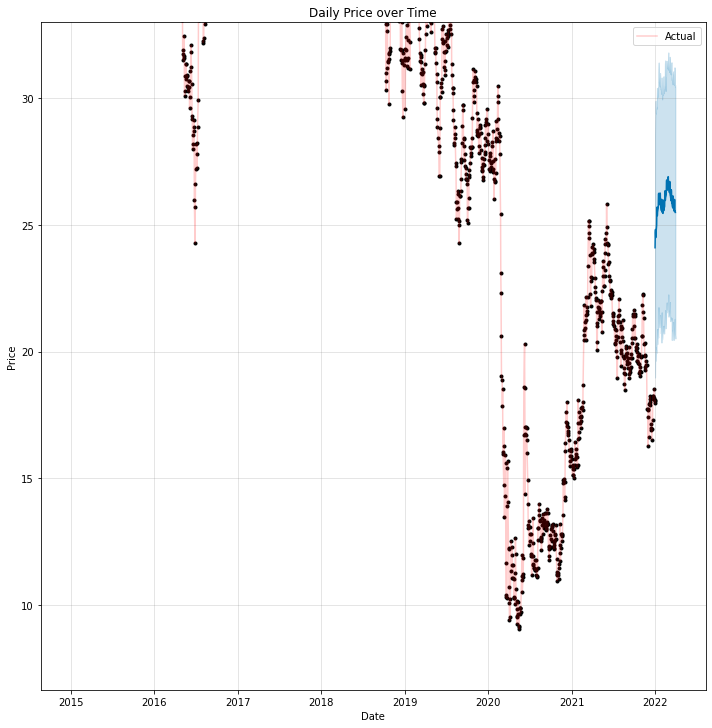

Prophet ROI:  41.96 %


In [28]:
fb_90, fb_roi = create_prophet(df,
                               exog = False,
                               logged = False,
                               plotting = True,
                               full = True,
                               roi = True,
                               return_roi = True)

# Conclusions:

> The ARIMA models expect a decline in growth of -5.8 % after 90 days

> The Auto ARIMA model expects a growth of 0.32 %. It shows a neutral growth rate over time.

> The Facebook Prophet model expects a growth of 41.96 % after 90 days. 